# **Ensemble Methods**
* Ensemble methods are `meta-algorithms` that `combine several machine learning techniques into one predictive model` in order to `decrease variance (bagging)`, `bias (boosting)`, or `improve predictions (stacking)`.
* Ensemble methods can be divided into two groups: *sequential* ensemble methods where the base learners are generated sequentially (e.g. AdaBoost) and *parallel* ensemble methods where the base learners are generated in parallel (e.g. Random Forest).
* The basic motivation of `sequential methods` is to exploit the dependence between the base learners since the overall performance can be boosted by weighing previously mislabeled examples with `higher weight`.
* The basic motivation of `parallel methods` is to exploit independence between the base learners since the error can be `reduced dramatically by averaging`.
* Most ensemble methods use a `single base learning algorithm` to produce homogeneous base learners, i.e. learners of the same type leading to *homogeneous ensembles*. There are also some methods that use heterogeneous learners, i.e. learners of different types, leading to *heterogeneous ensembles*. In order for ensemble methods to be more accurate than any of its individual members the base learners have to be as accurate as possible and as diverse as possible.


In [1]:
!pip install mlxtend --upgrade --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [2]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

### **1. Load Datasets**

In [3]:
iris = datasets.load_iris()
display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X, y = iris.data[:, 0:2], iris.target
display(X[:10])
display(y[:10])

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### **2. Bagging**
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train $M$ different trees $f_m$ on different subsets of the data (chosen randomly with replacement) and compute the ensemble:
\begin{equation}
   f(x) = \frac{1}{M}\sum_{m=1}^{M}f_m(x)
\end{equation}

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.
* https://svcuong.github.io/post/ensemble-learning/

In [5]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)

bagging1 = BaggingClassifier(estimator=clf1, n_estimators=10, # Tạo 10 bag độc lập chạy song song nhau
                             max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(estimator=clf2, n_estimators=10,
                             max_samples=0.8, max_features=0.8)

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.71 (+/- 0.03) [K-NN]
Accuracy: 0.73 (+/- 0.06) [Bagging Tree]
Accuracy: 0.65 (+/- 0.01) [Bagging K-NN]


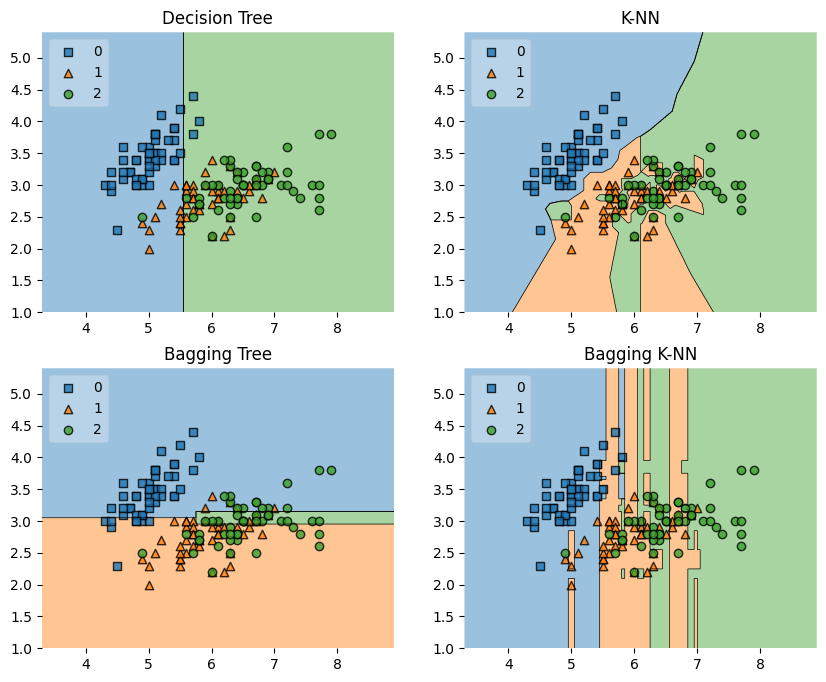

In [6]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat=2)

# Bagging và tổng hợp kết quả bằng SoftVoting (mean của các kết quả)
for clf, label, grd in zip(clf_list, label, grid):
  scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy') # cv=3: 3-fold cross validation
  print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))

  clf.fit(X, y)
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
  plt.title(label)

plt.show()

>**Note:**
* Kết quả chưa tốt vì trong base line model (DecisionTreeClassifier có max_depth=1, K-NN có n_neighbors=1), nếu các hyperparameter này tăng, sẽ cho kết quả tốt hơn

In [7]:
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf4 = KNeighborsClassifier(n_neighbors=3)

bagging3 = BaggingClassifier(estimator=clf3, n_estimators=10, # Tạo 10 bag độc lập chạy song song nhau
                             max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(estimator=clf4, n_estimators=10,
                             max_samples=0.8, max_features=0.8)

Accuracy: 0.65 (+/- 0.04) [Decision Tree]
Accuracy: 0.75 (+/- 0.02) [K-NN]
Accuracy: 0.75 (+/- 0.05) [Bagging Tree]
Accuracy: 0.69 (+/- 0.06) [Bagging K-NN]


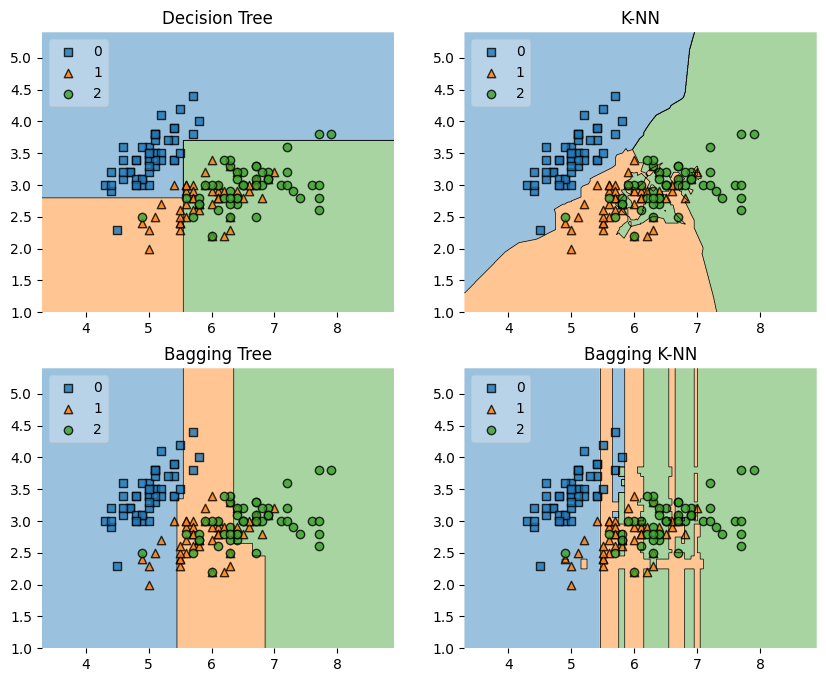

In [8]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf3, clf4, bagging3, bagging4]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat=2)

# Bagging và tổng hợp kết quả bằng SoftVoting (mean của các kết quả)
for clf, label, grd in zip(clf_list, label, grid):
  scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy') # cv=3: 3-fold cross validation
  print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))

  clf.fit(X, y)
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
  plt.title(label)

plt.show()

>**Conclusion**
* Kết quả đã tốt hơn
* Bagging K-NN lại có kết quả xấu hơn K-NN baseline ==> K-NN không phù hợp với Bagging

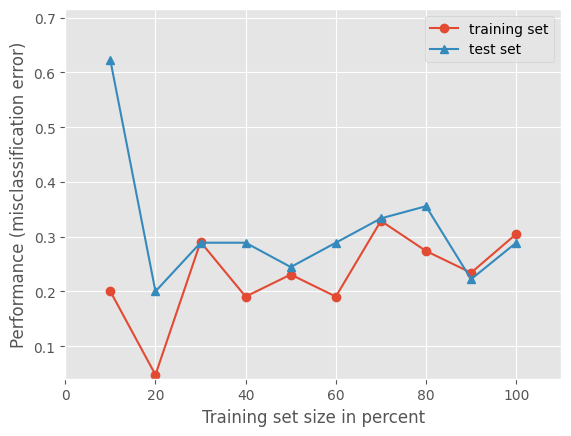

In [9]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test,
                     bagging1, print_model=False, style='ggplot')
plt.show()

>**Learning curves**
* Biểu diễn hiệu quả của model qua quá trình giữ nguyên số lượng samples của test set và tăng dần số lượng samples của training set.
* Quan sát Learning curves phía trên, ,model có xu hướng ổn định và hiệu quả hơn bắt đầu từ khoảng training set size là 60%.
* Tại vị trí training set size là 70%, giá trị Performance của training set và test set sát nhau thể hiện model không bị overfitting hay underfitting (vì nếu xảy ra 2 hiện tượng này thì Performance trên 2 tập phải cách xa nhau).
* ==> Trining set và test set nên chia theo tỉ lệ 70%-30%.

In [14]:
# Searching để tìm ra Ensemble size tốt nhất
num_est = map(int, np.linspace(1, 100, 20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
  bg_clf = BaggingClassifier(estimator=clf1, n_estimators=n_est,
                             max_samples=0.8, max_features=0.8)
  scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
  bg_clf_cv_mean.append(scores.mean())
  bg_clf_cv_std.append(scores.std())

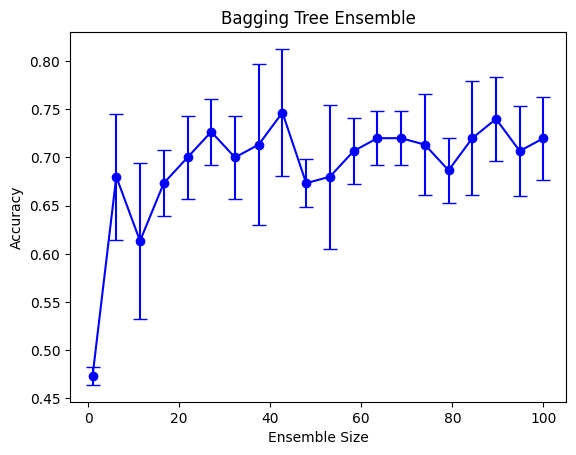

In [15]:
plt.figure()
(_, caps, _) = plt.errorbar(np.linspace(1, 100, 20), bg_clf_cv_mean, yerr=bg_clf_cv_std,
                            c='blue', fmt='-o', capsize=5)
for cap in caps:
  cap.set_markeredgewidth(1)
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.title('Bagging Tree Ensemble')
plt.show()

>**Note:**
* Quan sát biểu đồ thấy với Ensemble Size tại khoảng giá trị 43, accuracy đạt giá trị cao nhất tuy nhiên Accuracy tại đây có variance khá cao, vì thế không phải là tốt nhất.
* Tại Ensemble Size nằm vào khoảng giá trị cỡ 90 và 30, accuracy tại đây tuy thấp hơn 1 chút, nhưng lại có variance nhỏ, giá trị này là tốt hơn.

In [23]:
# Chọn Ensemble size tử 85 đến 95 và quan sát kết quả.
num_est = map(int, np.linspace(85, 95, 10))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
  bg_clf = BaggingClassifier(estimator=clf1, n_estimators=n_est,
                             max_samples=0.8, max_features=0.8)
  scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
  bg_clf_cv_mean.append(scores.mean())
  bg_clf_cv_std.append(scores.std())

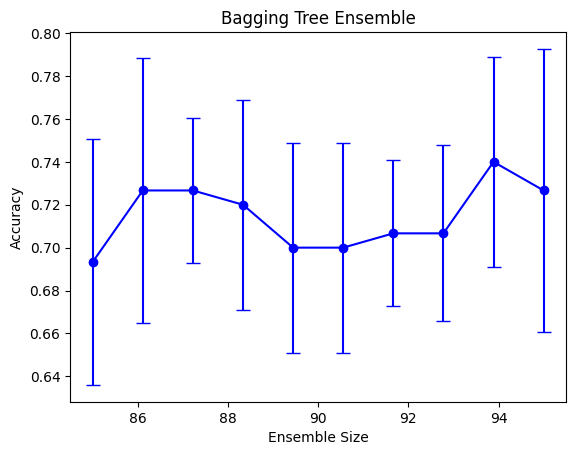

In [24]:
plt.figure()
(_, caps, _) = plt.errorbar(np.linspace(85, 95, 10), bg_clf_cv_mean, yerr=bg_clf_cv_std,
                            c='blue', fmt='-o', capsize=5)
for cap in caps:
  cap.set_markeredgewidth(1)
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.title('Bagging Tree Ensemble')
plt.show()

### **3. Boosting**
* Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.
* The main principle of boosting is to `fit a sequence of weak learners` (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds.
* The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction.
* The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.   

In [30]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

Accuracy: 0.65 (+/- 0.04) [AdaBoost (n_est=1)]
Accuracy: 0.57 (+/- 0.13) [AdaBoost (n_est=2)]
Accuracy: 0.74 (+/- 0.05) [AdaBoost (n_est=3)]
Accuracy: 0.71 (+/- 0.09) [AdaBoost (n_est=10)]


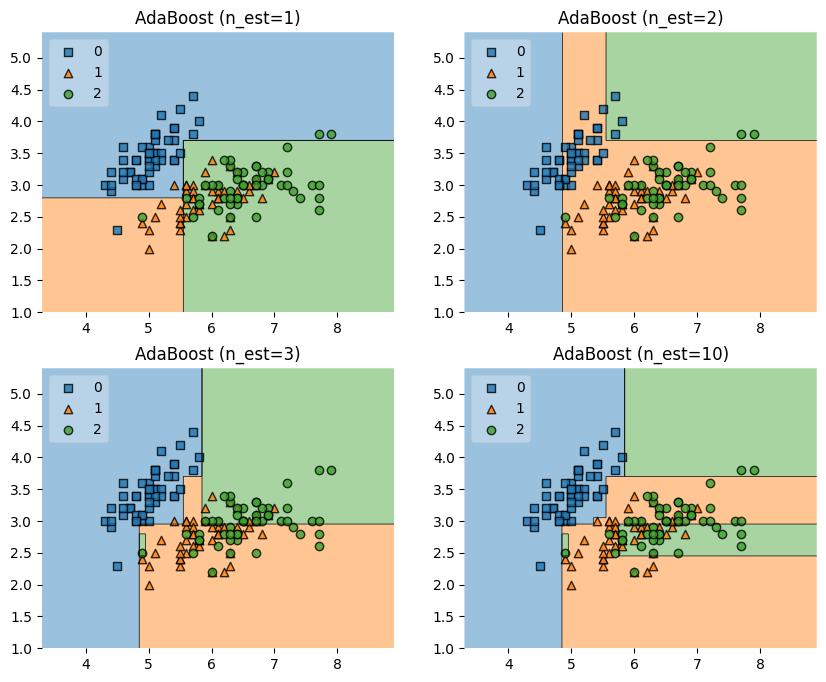

In [31]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):
    boosting = AdaBoostClassifier(estimator=clf, n_estimators=n_est)

    scores = cross_val_score(boosting, X, y, cv=3, scoring='accuracy') # cv=3: 3-fold cross validation
    print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))

    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label)

plt.show()

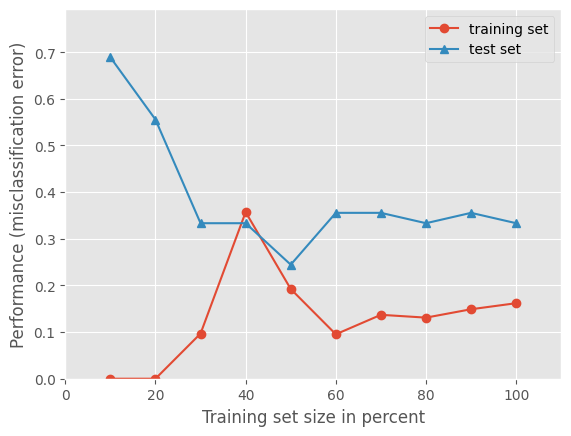

In [32]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
boosting = AdaBoostClassifier(estimator=clf, n_estimators=10)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test,
                     boosting, print_model=False, style='ggplot')
plt.show()

>**Note:**
* Tuy tại 40% training set size Accuracy sát nhau nhưng cũng không nên chia như vậy, ta nên tìm điểm Accuray của training set và test set gần nhau nhất ở khoảng trên 50%.
* Chia 80%-20%.

In [35]:
# Searching tìm Ensemble Size tốt nhất.
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

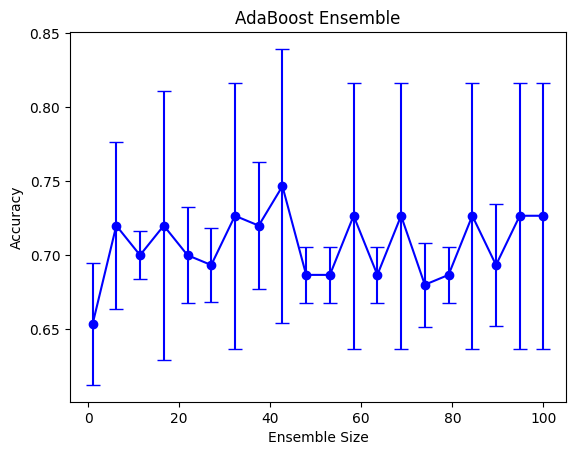

In [36]:
plt.figure()
(_, caps, _) = plt.errorbar(np.linspace(1,100,20), bg_clf_cv_mean,
                            yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.title('AdaBoost Ensemble');
plt.show()

>**Note:**
* Ensemble Size nằm xung quanh giá trị 37 cho kết quả tốt nhất.

In [38]:
# Searching tìm Ensemble Size tốt nhất.
num_est = map(int, np.linspace(35,45,10))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

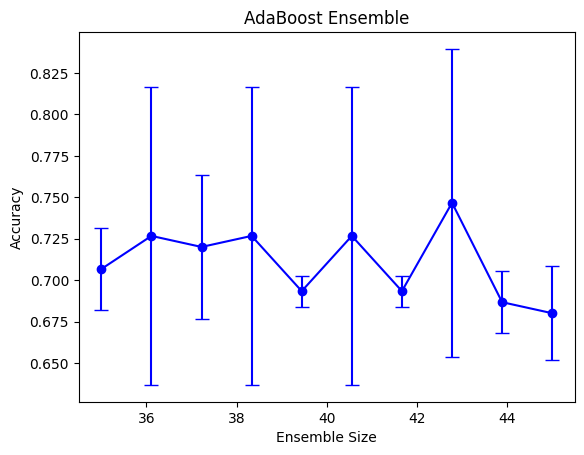

In [39]:
plt.figure()
(_, caps, _) = plt.errorbar(np.linspace(35,45,10), bg_clf_cv_mean,
                            yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.title('AdaBoost Ensemble');
plt.show()

In [40]:
# Chọn Ensemble Size = 37

ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=37)
scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
print('Accuracy: %.2f (+/- %.2f)' %(scores.mean(), scores.std()))

Accuracy: 0.72 (+/- 0.04)


### **4. Stacking**
* Stacking is an ensemble learning technique that `combines multiple classification or regression models via a meta-classifier or a meta-regressor`.
* The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features.
* The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.

In [43]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1) # base level model 1
clf2 = RandomForestClassifier(random_state=1) # base level model 2
clf3 = GaussianNB() # base level models 3
lr = LogisticRegression() # Meta-classifier
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [Stacking Classifier]


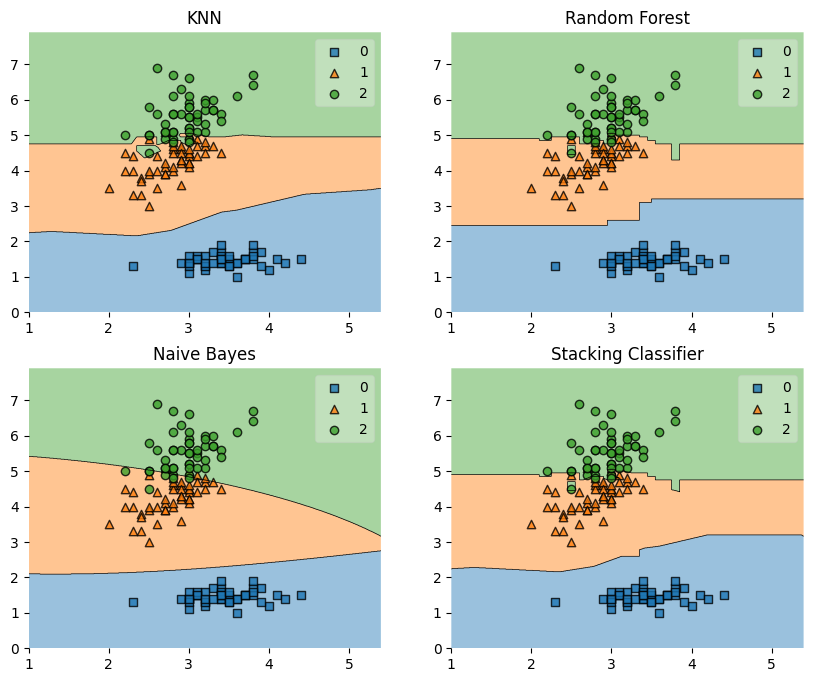

In [45]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
  scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
  print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))
  clf_cv_mean.append(scores.mean())
  clf_cv_std.append(scores.std())

  clf.fit(X, y)
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=X, y=y, clf=clf)
  plt.title(label)

plt.show()

>**Note:**
* The stacking ensemble is illustrated int the figure above.
* It consists of k-NN, Random Forest and Naive Bayes base classifiers whose predictions are combined by Lostic Regression as a meta-classifier.
* We can see the `blending of decision boundaries`(Sự pha trộn các ranh giới) achieved by the stacking classifier.

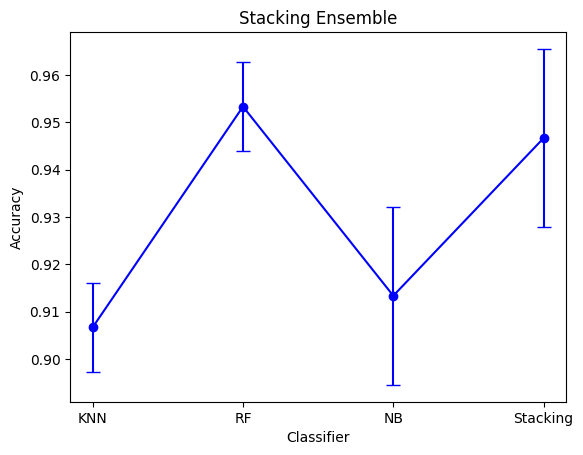

In [46]:
#plot classifier accuracy
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std,
                            c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Stacking Ensemble')
plt.show()

>**Note:**
* Trong bài này Random Forest là 1 thuật toán Bagging có kết quả tốt hơn Stacking.

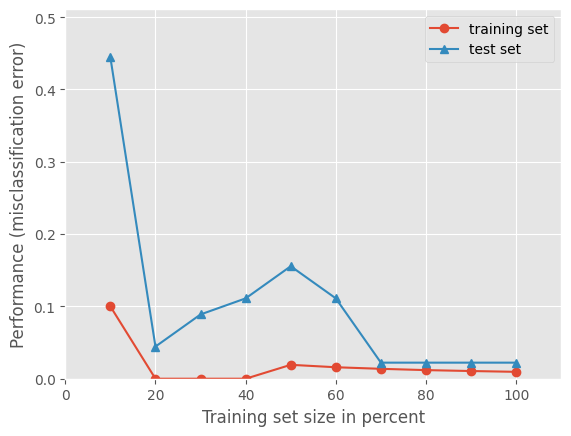

In [47]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test,
                     sclf, print_model=False, style='ggplot')
plt.show()

>**Note:**
* We can see that stacking achieves higher accuracy than individual classifiers and based on learning curves, it shows no signs of overfitting.

### **5. Note**
* Để 1 thuật toán `Ensemble Learning` tốt thì trước hết các thuật toán `Base Line` và `data` cũng phải tốt. Nếu `data` và `Base Line` không tốt thì cho dù `Ensemble Learning` có mạnh đến đâu thì kết quả của bài toán cũng sẽ không tốt.